[codebasics](https://www.youtube.com/watch?v=EItlUEPCIzM&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=14)

In [1]:
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

      Name  Age  Income($)
0      Rob   27      70000
1  Michael   29      90000
2    Mohan   29      61000
3   Ismail   28      60000
4     Kory   42     150000

      Name       Age  Income($)
0      Rob -1.324878  -0.469633
1  Michael -0.985955  -0.009925
2    Mohan -0.985955  -0.676501
3   Ismail -1.155416  -0.699486
4     Kory  1.217039   1.369196


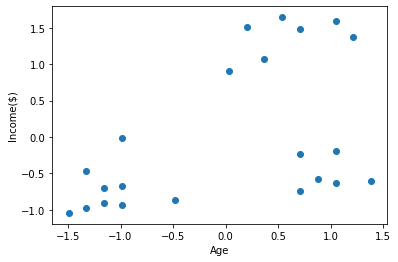

In [3]:
df = pd.read_csv("income.csv")
print(df.head())
print()

dg = df[['Age', 'Income($)']]
df[['Age', 'Income($)']] = (dg - dg.mean()) /dg.std()
print(df.head())

plt.scatter(df['Age'], df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

[0 0 0 0 2 2 2 2 2 2 2 0 0 0 0 0 1 1 1 1 1 1]
      Name       Age  Income($)  cluster
0      Rob -1.324878  -0.469633        0
1  Michael -0.985955  -0.009925        0
2    Mohan -0.985955  -0.676501        0
3   Ismail -1.155416  -0.699486        0
4     Kory  1.217039   1.369196        2
[[-1.0989294  -0.73141022]
 [ 0.96284702 -0.50027972]
 [ 0.58761178  1.36919576]]


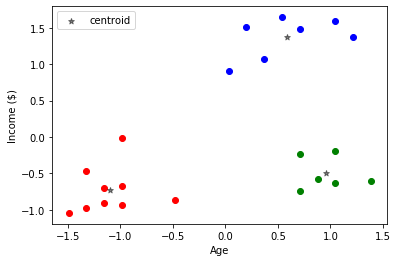

In [4]:
km = KMeans(n_clusters=3, random_state=0)
y_pred = km.fit_predict(df[['Age','Income($)']])
print(y_pred)

df['cluster'] = y_pred
print(df.head())

print(km.cluster_centers_)

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age, df1['Income($)'], color='r')
plt.scatter(df2.Age, df2['Income($)'], color='g')
plt.scatter(df3.Age, df3['Income($)'], color='b')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='k', marker='*', label='centroid', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()
plt.show()

<h4 style='color:purple'>Elbow Plot</h4>

In [5]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

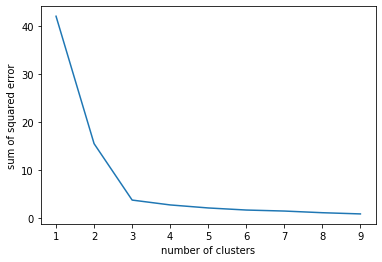

In [6]:
plt.xlabel('number of clusters')
plt.ylabel('sum of squared error')
plt.plot(k_rng, sse)
plt.show()

<h4 style='color:purple'>Exercise</h4>

<img src='iris.png' width=200 height=200>

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k